# **Problem Statement**

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

**Goals of the Case Study**

 - Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
 

 - There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

# **Segment - I : Data Understanding**

## Importing the libraries and reading the dataset

In [257]:
# Importing the useful libraries and functions

# Suppress Warnings

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# Import Numpy and Pandas Library

import pandas as pd
import numpy as np

# Import Matplotlib and Seaborn Libraries for Data visualization

import matplotlib.pyplot as plt
import seaborn as sns

# Using Pandas Inbuilt function to display all columns and rows present in Dataset

pd.pandas.set_option('display.max_columns', None)
pd.pandas.set_option('display.max_rows', None)

# Using sklearn library and importing train_test_split function to create Training & Test Datasets

from sklearn.model_selection import train_test_split

# Using sklearn library and importing MinMaxScaler function for feature scaling

from sklearn.preprocessing import MinMaxScaler

# Using sklearn library and importing RFE and LogisticRegression

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Importing statsmodel library

import statsmodels.api as sm

In [258]:
# Reading the dataset

leads = pd.read_csv("Leads.csv")

In [259]:
# Printing the first five rows of the dataframe 'leads'

leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## Data inspection

### Basic structure checking

In [260]:
# Checking the shape of dataframe

leads.shape

(9240, 37)

**There are 9240 rows and 37 columns initially.**

In [261]:
# Printing information about the attributes of 'leads'

leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [262]:
# Checking the size of dataframe

leads.size

341880

In [263]:
# Checking datatypes of all columns

leads.dtypes


Prospect ID                                       object
Lead Number                                        int64
Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
How did you hear about X Education                object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Magazine                       

In [264]:
# Finding the basic statistical values for numerical data

leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### Checking missing values and duplicated rows

In [265]:
# Calculating the missing values in each column of the dataframe

leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [266]:
# Calculating the percentage of missing values in each column

round(100*(leads.isnull().sum())/len(leads), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [267]:
# Checking for duplicated rows

leads.duplicated().sum()

0

In [268]:
leads.shape,leads.drop_duplicates().shape

((9240, 37), (9240, 37))

***Observation:***

**There are no duplicated rows in this dataframe. The same is verified by checking the shape of the dataframe before and after dropping duplicates, if any.**

## **Data cleaning**


In [269]:
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

### Checking value counts for each categorical column

In [270]:
var_list = ['Lead Source', 'Do Not Email', 'Do Not Call', 'Converted', 'Last Activity', 'Country', 'Specialization',
            'How did you hear about X Education', 'What is your current occupation', 
            'What matters most to you in choosing a course', 'Search', 'Magazine', 'Newspaper Article', 
            'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations',
            'Receive More Updates About Our Courses', 'Tags', 'Lead Quality', 'Update me on Supply Chain Content', 
            'Get updates on DM Content', 'Lead Profile', 'City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 
            'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'Last Notable Activity']


for i in var_list:
    ans=leads[i].value_counts(dropna=False)
    print(f"{i} Count:\n\n{ans}",end='\n\n\n')
    

Lead Source Count:

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64


Do Not Email Count:

No     8506
Yes     734
Name: Do Not Email, dtype: int64


Do Not Call Count:

No     9238
Yes       2
Name: Do Not Call, dtype: int64


Converted Count:

0    5679
1    3561
Name: Converted, dtype: int64


Last Activity Count:

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited 

**Observation:**

**There are categories named 'Select' in columns like 'Specialization', 'How did you hear about X Education', 'Lead Profile', etc. This is because the site visitors have not selected any response for this and it is as good as NaN or a null value. Hence, replacing 'Select' with NaN.**

### Replacing 'Select' with NaN

In [271]:
# Replacing 'Select' with NaN since no option is selected for these values

leads = leads.replace('Select',np.nan)

### Dropping columns having more than 40% null values

In [272]:
# Finding missing value percencentage in each column

null_percent = round(100*(leads.isnull().sum())/len(leads), 2)
print(null_percent)

# List of columns having more than 40% null values.

null_percent[null_percent > 40].index

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

Index(['How did you hear about X Education', 'Lead Quality', 'Lead Profile',
       'Asymmetrique Activity Index', 'Asymmetrique Profile Index',
       'Asymmetrique Activity Score', 'Asymmetrique Profile Score'],
      dtype='object')

**Approach :**

1. Dropping all the columns that have extremely high missing values. Considering that value as 40% in this case study.

In [273]:
# Dropping columns having more than 40% of null values

leads = leads.drop(null_percent[null_percent > 40].index , axis= 1)

# Checking the shape again after dropping columns
leads.shape

(9240, 30)

### Checking the number of unique values in each column

In [274]:
# Finding the number of unique values in each column

leads.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums          

**Observation:**

1. There are columns which have just one unique value and these will not play any significant role in further analysis. Hence, dropping those columns.

In [275]:
# Dropping unique valued columns

leads= leads.drop(['Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content',
                   'Get updates on DM Content','I agree to pay the amount through cheque'],axis=1)
leads.shape

(9240, 25)

In [276]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,Interested in other courses,NaN,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,Ringing,NaN,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Mumbai,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,Ringing,Mumbai,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Mumbai,No,Modified


### Dropping unnecassary columns

In [277]:
# Checking rows which have all NaN values.

leads[leads.isnull().all(axis=1)].shape

(0, 25)

**There are no rows which have all null values present.**

**'Prospect ID' and 'Lead Number' is the unique ID and a lead number assigned to each lead, with which the customer is identified. These are all unique values, hence dropping these columns as they will not provide any insight to the analysis.**

In [278]:
# Dropping 'Lead Number' and 'Prospect ID'.

leads.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)
leads.shape

(9240, 23)

In [279]:
# Checking null value percentage in each column

round(100*(leads.isnull().sum())/len(leads),2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Re

**Country**

In [280]:
# Checking the unique categories in 'Country'

leads['Country'].value_counts(normalize=True,dropna=False)

India                   0.702597
NaN                     0.266342
United States           0.007468
United Arab Emirates    0.005736
Singapore               0.002597
Saudi Arabia            0.002273
United Kingdom          0.001623
Australia               0.001407
Qatar                   0.001082
Bahrain                 0.000758
Hong Kong               0.000758
Oman                    0.000649
France                  0.000649
unknown                 0.000541
Kuwait                  0.000433
South Africa            0.000433
Canada                  0.000433
Nigeria                 0.000433
Germany                 0.000433
Sweden                  0.000325
Philippines             0.000216
Uganda                  0.000216
Italy                   0.000216
Bangladesh              0.000216
Netherlands             0.000216
Asia/Pacific Region     0.000216
China                   0.000216
Belgium                 0.000216
Ghana                   0.000216
Kenya                   0.000108
Sri Lanka 

**It can be seen, more than 70% of the entries are from 'India' and more than 26% are missing values, hence dropping this column as it will not provide anything significant in the analysis.**

In [281]:
# Dropping column 'Country'

leads.drop(['Country'], 1, inplace = True)
leads.shape

(9240, 22)

**Specialization**

In [282]:
# Checking the unique categories in 'Specialization'

leads['Specialization'].value_counts(normalize=True,dropna=False)

NaN                                  0.365801
Finance Management                   0.105628
Human Resource Management            0.091775
Marketing Management                 0.090693
Operations Management                0.054437
Business Administration              0.043615
IT Projects Management               0.039610
Supply Chain Management              0.037771
Banking, Investment And Insurance    0.036580
Travel and Tourism                   0.021970
Media and Advertising                0.021970
International Business               0.019264
Healthcare Management                0.017208
Hospitality Management               0.012338
E-COMMERCE                           0.012121
Retail Management                    0.010823
Rural and Agribusiness               0.007900
E-Business                           0.006169
Services Excellence                  0.004329
Name: Specialization, dtype: float64

In [283]:
leads['Specialization'] = leads['Specialization'].fillna('Unspecified')

In [284]:
def specialization_categories(x):
    
    if x in ['Finance Management','Human Resource Management','Marketing Management','Operations Management',
             'IT Projects Management', 'Supply Chain Management', 'Healthcare Management', 'Hospitality Management',
             'Retail Management']:
        return 'Management Specializations'
    elif x == 'Business Administration':
        return 'Business Administration'
    elif x == 'Banking, Investment And Insurance':
        return 'Banking'
    elif x == 'Unspecified':
        return 'Unspecified'
    elif x in ['Travel and Tourism', 'Media and Advertising']:
        return 'Tourism and Advertising'
    
    else:
        return 'Others'

leads['Specialization'] = leads['Specialization'].apply(specialization_categories)
leads['Specialization'].value_counts(normalize=True)

Management Specializations    0.460281
Unspecified                   0.365801
Others                        0.049784
Tourism and Advertising       0.043939
Business Administration       0.043615
Banking                       0.036580
Name: Specialization, dtype: float64

In [285]:
# Checking null value percentage in each column

round(100*(leads.isnull().sum())/len(leads),2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Specialization                                    0.00
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Recommendations                           0.00
Tags      

**City**

In [286]:
# Checking the unique categories in 'City'

leads['City'].value_counts(normalize=True,dropna=False)

NaN                            0.397078
Mumbai                         0.348701
Thane & Outskirts              0.081385
Other Cities                   0.074242
Other Cities of Maharashtra    0.049459
Other Metro Cities             0.041126
Tier II Cities                 0.008009
Name: City, dtype: float64

In [287]:
def city_categories(x):
    
    if x == 'Mumbai':
        return 'Mumbai'
    elif x in ['Thane & Outskirts', 'Other Cities of Maharashtra']:
        return 'Maharashtra others'
    elif x == 'Other Metro Cities':
        return 'Metro'
    else:
        return 'Others'

leads['City'] = leads['City'].apply(city_categories)
leads['City'].value_counts(normalize=True)

Others                0.479329
Mumbai                0.348701
Maharashtra others    0.130844
Metro                 0.041126
Name: City, dtype: float64

**Tags**

In [288]:
leads['Tags'].value_counts(normalize=True, dropna=False)

NaN                                                  0.362879
Will revert after reading the email                  0.224242
Ringing                                              0.130195
Interested in other courses                          0.055519
Already a student                                    0.050325
Closed by Horizzon                                   0.038745
switched off                                         0.025974
Busy                                                 0.020130
Lost to EINS                                         0.018939
Not doing further education                          0.015693
Interested  in full time MBA                         0.012662
Graduation in progress                               0.012013
invalid number                                       0.008983
Diploma holder (Not Eligible)                        0.006818
wrong number given                                   0.005087
opp hangup                                           0.003571
number n

In [289]:
# Combining categories in the column 'Tags' as 'Others' for values less than 2%

leads['Tags'] = leads['Tags'].replace([np.nan,'Lost to EINS',
                             'Not doing further education',
                            'Interested  in full time MBA',
                                  'Graduation in progress',
                                          'invalid number',
                           'Diploma holder (Not Eligible)',
                                      'wrong number given',
                                              'opp hangup',
                                     'number not provided',
                                      'in touch with EINS',
                                          'Lost to Others',
                                          'Still Thinking',
       'Want to take admission but has financial problems',
                   'In confusion whether part time or DLP',
                                'Interested in Next batch',
                                         'Lateral student',
                     'Shall take in the next coming month',
                               'University not recognized',
                        'Recognition issue (DEC approval)'], 'Others')

leads['Tags'].value_counts(normalize=True)

Others                                 0.454870
Will revert after reading the email    0.224242
Ringing                                0.130195
Interested in other courses            0.055519
Already a student                      0.050325
Closed by Horizzon                     0.038745
switched off                           0.025974
Busy                                   0.020130
Name: Tags, dtype: float64

In [290]:
leads.shape

(9240, 22)

**What is your current occupation**

In [291]:
# Checking the unique value counts for the column 'What is your current occupation'

leads['What is your current occupation'].value_counts(normalize=True, dropna=False)

Unemployed              0.606061
NaN                     0.291126
Working Professional    0.076407
Student                 0.022727
Other                   0.001732
Housewife               0.001082
Businessman             0.000866
Name: What is your current occupation, dtype: float64

In [292]:
# Replacing NaN with "Unspecified" in the column 'What is your current occupation' 

leads['Occupation'] = leads['What is your current occupation'].replace(np.nan,"Unspecified")
leads.drop(['What is your current occupation'],1, inplace=True)
leads['Occupation'].isnull().sum()

0

In [293]:
leads['Occupation'].value_counts(normalize=True, dropna=False)

Unemployed              0.606061
Unspecified             0.291126
Working Professional    0.076407
Student                 0.022727
Other                   0.001732
Housewife               0.001082
Businessman             0.000866
Name: Occupation, dtype: float64

In [294]:
# Checking null value percentage in each column

round(100*(leads.isnull().sum())/len(leads),2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Specialization                                    0.00
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Recommendations                           0.00
Tags                                              0.00
City      

**What matters most to you in choosing a course**

In [296]:
# Checking the unique value counts for the column 'What matters most to you in choosing a course'

leads['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [299]:
# Replacing NaN with "Other" in the column 'What matters most to you in choosing a course' 

leads['Course Motto'] = leads['What matters most to you in choosing a course'].replace(np.nan,"Other")
leads.drop(['What matters most to you in choosing a course'],1, inplace=True)
leads['Course Motto'].isnull().sum()

0

In [300]:
leads['Course Motto'].value_counts(dropna=False)

Better Career Prospects      6528
Other                        2710
Flexibility & Convenience       2
Name: Course Motto, dtype: int64

In [301]:
# Checking null value percentage in each column

round(100*(leads.isnull().sum())/len(leads),2)

Lead Origin                               0.00
Lead Source                               0.39
Do Not Email                              0.00
Do Not Call                               0.00
Converted                                 0.00
TotalVisits                               1.48
Total Time Spent on Website               0.00
Page Views Per Visit                      1.48
Last Activity                             1.11
Specialization                            0.00
Search                                    0.00
Newspaper Article                         0.00
X Education Forums                        0.00
Newspaper                                 0.00
Digital Advertisement                     0.00
Through Recommendations                   0.00
Tags                                      0.00
City                                      0.00
A free copy of Mastering The Interview    0.00
Last Notable Activity                     0.00
Occupation                                0.00
Course Motto 

**There are columns which have very less missing values. Dropping the rows corresponding to the columns having very low missing values.**

**Lead Source**

In [304]:
leads['Lead Source'].value_counts(dropna=False, normalize=True)

Google               0.311604
Direct Traffic       0.276293
Olark Chat           0.190678
Organic Search       0.125380
Reference            0.058018
Welingak Website     0.015428
Referral Sites       0.013581
Facebook             0.005976
bing                 0.000652
google               0.000543
Click2call           0.000435
Press_Release        0.000217
Social Media         0.000217
Live Chat            0.000217
youtubechannel       0.000109
testone              0.000109
Pay per Click Ads    0.000109
welearnblog_Home     0.000109
WeLearn              0.000109
blog                 0.000109
NC_EDM               0.000109
Name: Lead Source, dtype: float64

In [303]:
# Dropping the null valued rows in the column 'Lead Source'

leads=leads[~pd.isnull(leads['Lead Source'])]



In [305]:
# Combining categories


def lead_source_categories(x):
    
    if x in  ['Google','google']:
        return 'Google'
    elif x in ['Facebook','Social Media']:
        return 'Social Media'
    elif x == 'Direct Traffic':
        return 'Direct Traffic'
    elif x == 'Olark Chat':
        return 'Olark Chat'
    elif x == 'Organic Search':
        return 'Organic Search'
    elif x == 'Reference':
        return 'Reference'
    else:
        return 'Others'

leads['Lead Source'] = leads['Lead Source'].apply(lead_source_categories)
leads['Lead Source'].value_counts(normalize=True)

Google            0.312147
Direct Traffic    0.276293
Olark Chat        0.190678
Organic Search    0.125380
Reference         0.058018
Others            0.031291
Social Media      0.006193
Name: Lead Source, dtype: float64

**TotalVisits**

In [306]:
leads['TotalVisits'].isnull().sum()

130

In [313]:
print(leads['TotalVisits'].mean())
print(leads['TotalVisits'].median())

3.449587136027814
3.0


In [310]:
leads['TotalVisits'] = leads['TotalVisits'].fillna(leads['TotalVisits'].median())
leads['TotalVisits'].isnull().sum()

0

**Page Views Per Visit**

In [311]:
leads['Page Views Per Visit'].isnull().sum()

130

In [312]:
print(leads['Page Views Per Visit'].mean())
print(leads['Page Views Per Visit'].median())

2.370150980824334
2.0


In [314]:
leads['Page Views Per Visit'] = leads['Page Views Per Visit'].fillna(leads['Page Views Per Visit'].median())
leads['Page Views Per Visit'].isnull().sum()

0

**Last Activity**

In [315]:
leads['Last Activity'].value_counts(dropna=False, normalize=True)

Email Opened                    0.372881
SMS Sent                        0.295850
Olark Chat Conversation         0.105715
Page Visited on Website         0.069535
Converted to Lead               0.046502
Email Bounced                   0.034876
Email Link Clicked              0.029009
Form Submitted on Website       0.012603
NaN                             0.010973
Unreachable                     0.010104
Unsubscribed                    0.006410
Had a Phone Conversation        0.003259
Approached upfront              0.000978
View in browser link Clicked    0.000652
Email Received                  0.000217
Email Marked Spam               0.000217
Visited Booth in Tradeshow      0.000109
Resubscribed to emails          0.000109
Name: Last Activity, dtype: float64

In [328]:
# Combining categories in the column 'Last Activity' for value counts less than ~3%

leads['Last Activity'] = leads['Last Activity'].replace([np.nan,'Form Submitted on Website', 'Unreachable',
                                                        'Unsubscribed', 'Had a Phone Conversation', 'Approached upfront',
                                                        'View in browser link Clicked', 'Email Received', 'Email Marked Spam',
                                                        'Visited Booth in Tradeshow', 'Resubscribed to emails'], 'Others')

leads['Last Activity'].value_counts(normalize=True)

Email Opened               0.372881
SMS Sent                   0.295850
Olark Chat Conversation    0.105715
Page Visited on Website    0.069535
Converted to Lead          0.046502
Others                     0.045632
Email Bounced              0.034876
Email Link Clicked         0.029009
Name: Last Activity, dtype: float64

**Last Notable Activity**

In [329]:
leads['Last Notable Activity'].value_counts(dropna=False, normalize=True)

Modified                        0.369079
Email Opened                    0.306714
SMS Sent                        0.233811
Page Visited on Website         0.034550
Olark Chat Conversation         0.019883
Email Link Clicked              0.018796
Email Bounced                   0.006519
Unsubscribed                    0.004889
Unreachable                     0.003477
Had a Phone Conversation        0.001521
Email Marked Spam               0.000217
Approached upfront              0.000109
Resubscribed to emails          0.000109
View in browser link Clicked    0.000109
Form Submitted on Website       0.000109
Email Received                  0.000109
Name: Last Notable Activity, dtype: float64

In [330]:
leads['Last Notable Activity'].value_counts().index

Index(['Modified', 'Email Opened', 'SMS Sent', 'Page Visited on Website',
       'Olark Chat Conversation', 'Email Link Clicked', 'Email Bounced',
       'Unsubscribed', 'Unreachable', 'Had a Phone Conversation',
       'Email Marked Spam', 'Approached upfront', 'Resubscribed to emails',
       'View in browser link Clicked', 'Form Submitted on Website',
       'Email Received'],
      dtype='object')

In [331]:
# Combining categories in the column 'Last Notable Activity' for value counts less than ~3%

leads['Last Notable Activity'] = leads['Last Notable Activity'].replace(['Olark Chat Conversation','Email Link Clicked', 
                                                                         'Email Bounced', 'Unsubscribed', 'Unreachable', 
                                                                         'Had a Phone Conversation', 'Email Marked Spam',
                                                                         'Approached upfront', 'Resubscribed to emails', 
                                                                         'View in browser link Clicked', 'Form Submitted on Website',
                                                                         'Email Received'], 'Others')

leads['Last Notable Activity'].value_counts(normalize=True)
    

                                                                        

Modified                   3397
Email Opened               2823
SMS Sent                   2152
Others                      514
Page Visited on Website     318
Name: Last Notable Activity, dtype: int64

**'Newspaper' and 'Newspaper Article'**

In [332]:
print(leads['Newspaper'].value_counts(normalize=True))

print(leads['Newspaper Article'].value_counts(normalize=True))

No     0.999891
Yes    0.000109
Name: Newspaper, dtype: float64
No     0.999783
Yes    0.000217
Name: Newspaper Article, dtype: float64


**'Newspaper' and 'Newspaper Article' have almost similar results, and more than 99.9% values are marked 'No'. So dropping these two columns as it will give nothing significant**

In [333]:
# Dropping column 'Newspaper' and 'Newspaper Article'

leads.drop(['Newspaper','Newspaper Article'], 1, inplace = True)
leads.shape

(9204, 20)

In [334]:
# Checking null value percentage

round(100*(leads.isnull().sum())/len(leads),2)

Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Do Not Call                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
Search                                    0.0
X Education Forums                        0.0
Digital Advertisement                     0.0
Through Recommendations                   0.0
Tags                                      0.0
City                                      0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
Occupation                                0.0
Course Motto                              0.0
dtype: float64

In [335]:
leads.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Specialization', 'Search',
       'X Education Forums', 'Digital Advertisement',
       'Through Recommendations', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity',
       'Occupation', 'Course Motto'],
      dtype='object')

In [339]:
var_list = ['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'Last Activity', 'Specialization', 'Search',
       'X Education Forums', 'Digital Advertisement',
       'Through Recommendations', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity',
       'Occupation', 'Course Motto']


for i in var_list:
    ans=leads[i].value_counts(dropna=False, normalize=True)
    print(f"{i} Count:\n\n{ans}",end='\n\n\n')

Lead Origin Count:

Landing Page Submission    0.530748
API                        0.388961
Lead Add Form              0.074424
Lead Import                0.005867
Name: Lead Origin, dtype: float64


Lead Source Count:

Google            0.312147
Direct Traffic    0.276293
Olark Chat        0.190678
Organic Search    0.125380
Reference         0.058018
Others            0.031291
Social Media      0.006193
Name: Lead Source, dtype: float64


Do Not Email Count:

No     0.921664
Yes    0.078336
Name: Do Not Email, dtype: float64


Do Not Call Count:

No     0.999783
Yes    0.000217
Name: Do Not Call, dtype: float64


Converted Count:

0    0.616254
1    0.383746
Name: Converted, dtype: float64


Last Activity Count:

Email Opened               0.372881
SMS Sent                   0.295850
Olark Chat Conversation    0.105715
Page Visited on Website    0.069535
Converted to Lead          0.046502
Others                     0.045632
Email Bounced              0.034876
Email Link Clicked     

**'Do Not Call','Search', 'X Education Forums','Digital Advertisement','Through Recommendations' have 99.9% single value, which signifies very high data imbalance. Hence, these columns will not add any significance to the model building.**

In [340]:
# Dropping column 'Do Not Call','Search', 'X Education Forums','Digital Advertisement','Through Recommendations'

leads.drop(['Do Not Call','Search', 'X Education Forums','Digital Advertisement','Through Recommendations'], 1, inplace = True)
leads.shape

(9204, 15)

# **Segment - II : Exploratory Data Analysis**

## Segregating continuous and categorical variables

In [342]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9204 entries, 0 to 9239
Data columns (total 15 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9204 non-null   object 
 1   Lead Source                             9204 non-null   object 
 2   Do Not Email                            9204 non-null   object 
 3   Converted                               9204 non-null   int64  
 4   TotalVisits                             9204 non-null   float64
 5   Total Time Spent on Website             9204 non-null   int64  
 6   Page Views Per Visit                    9204 non-null   float64
 7   Last Activity                           9204 non-null   object 
 8   Specialization                          9204 non-null   object 
 9   Tags                                    9204 non-null   object 
 10  City                                    9204 non-null   obje

In [343]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Tags,City,A free copy of Mastering The Interview,Last Notable Activity,Occupation,Course Motto
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Unspecified,Interested in other courses,Others,No,Modified,Unemployed,Better Career Prospects
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Unspecified,Ringing,Others,No,Email Opened,Unemployed,Better Career Prospects
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Will revert after reading the email,Mumbai,Yes,Email Opened,Student,Better Career Prospects
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Others,Tourism and Advertising,Ringing,Mumbai,No,Modified,Unemployed,Better Career Prospects
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Unspecified,Will revert after reading the email,Mumbai,No,Modified,Unemployed,Better Career Prospects


In [344]:
# Separating continuous and categorical columns

cont_cols=['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

cat_cols = ['Lead Origin', 'Lead Source', 'Do Not Email',
           'Last Activity', 'Specialization', 'Tags', 'City',
           'A free copy of Mastering The Interview', 'Last Notable Activity',
           'Occupation', 'Course Motto']

target=['Converted']

len(cont_cols)+len(cat_cols)+len(target)

15

**Checking data imbalance in target variable**

In [346]:
leads.Converted.value_counts(normalize=True, dropna=False)

0    0.616254
1    0.383746
Name: Converted, dtype: float64

## Univariate Analysis

### Univariate Analysis on Numerical columns

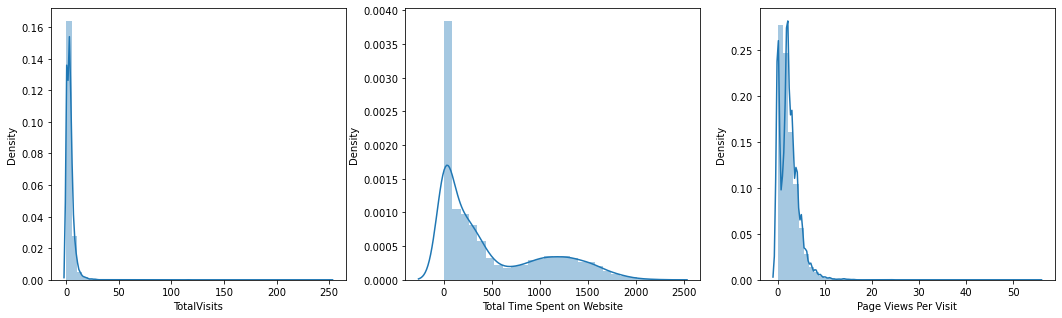

In [347]:
# Plotting distribution curve for continuous columns

plt.figure(figsize=(18,5))
for num in enumerate(cont_cols):
    plt.subplot(len(cont_cols)//2,3,num[0]+1)
    sns.distplot(leads[num[1]])
plt.show()

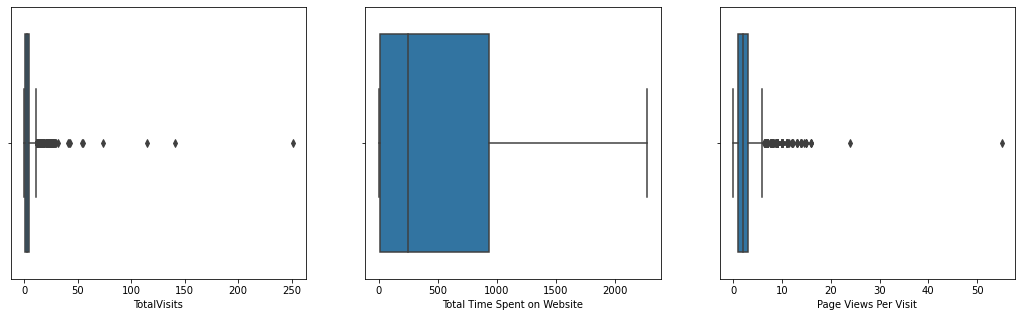

In [348]:
# Plotting boxplot on continuous columns for outlier detection

plt.figure(figsize=(18,5))
for num in enumerate(cont_cols):
    plt.subplot(len(cont_cols)//2,3,num[0]+1)
    sns.boxplot(leads[num[1]])
plt.show()

In [ ]:
len(cat_cols)

### Univariate Analysis on Categorical columns

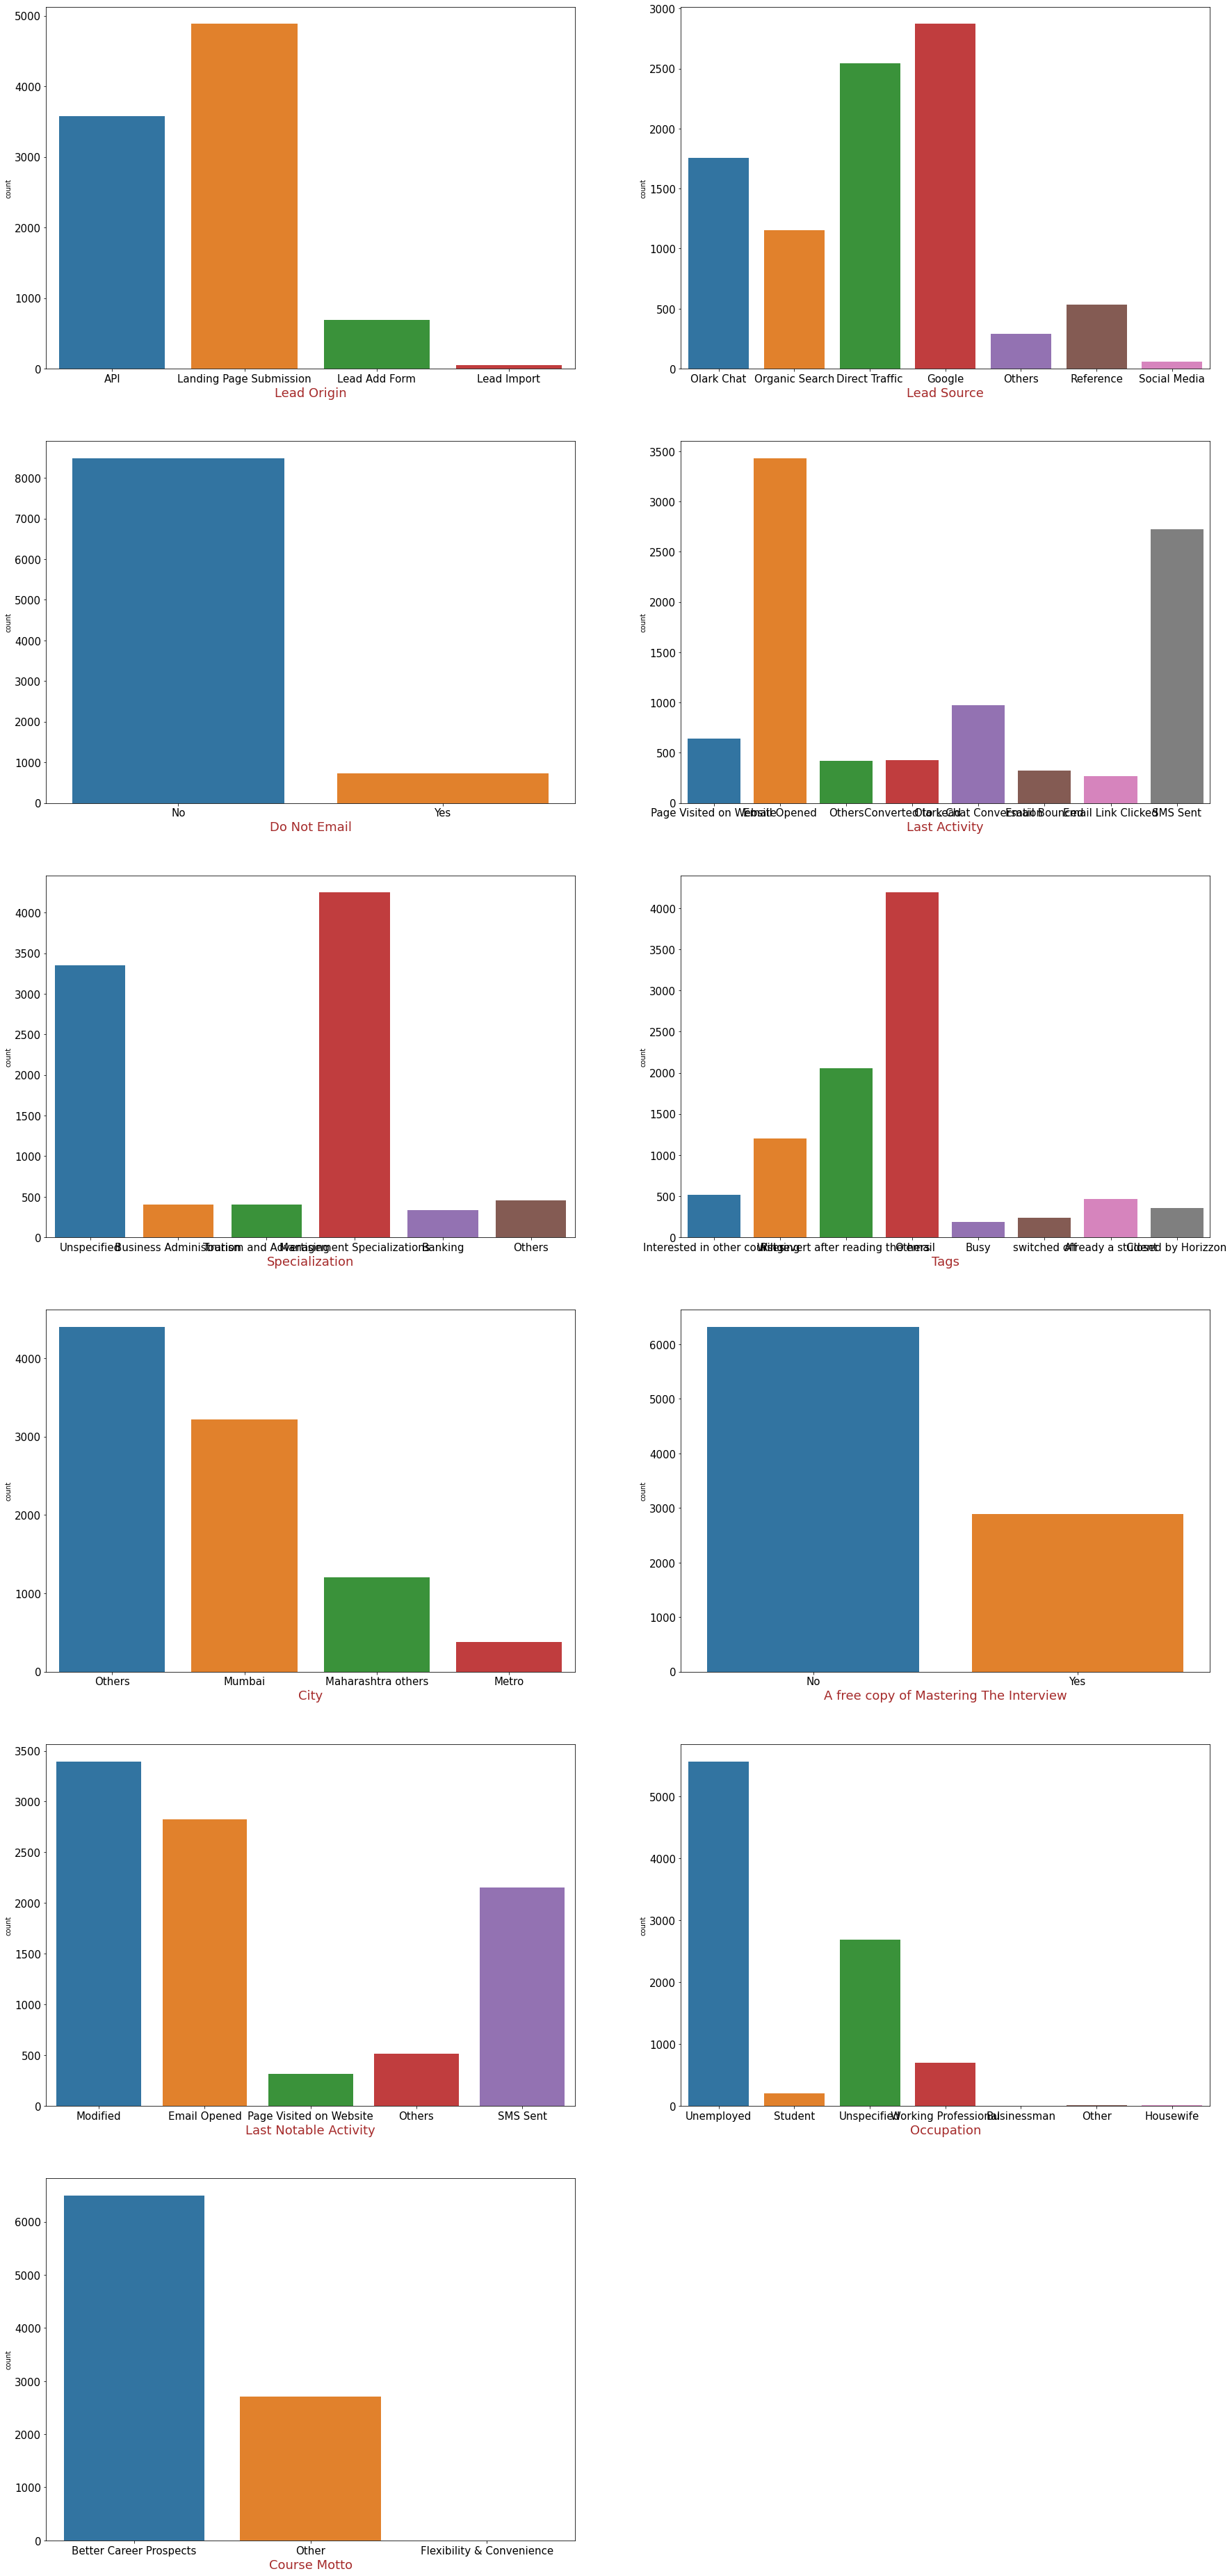

In [355]:
# Plotting Countplot for univariate analysis of categorical columns
 

plt.figure(figsize=(30,90))
for cat in enumerate(cat_cols):
    plt.subplot(8,2,cat[0]+1)
    sns.countplot(leads[cat[1]])
    plt.xlabel(cat[1], fontsize=18, fontweight=5, color='Brown')
    plt.yticks(rotation=0, fontsize=15)
    plt.xticks(rotation=0, fontsize=15)
plt.show()


## Bivariate Analysis

### Bivariate analysis of numerical variables with respect to target variable 'Converted'

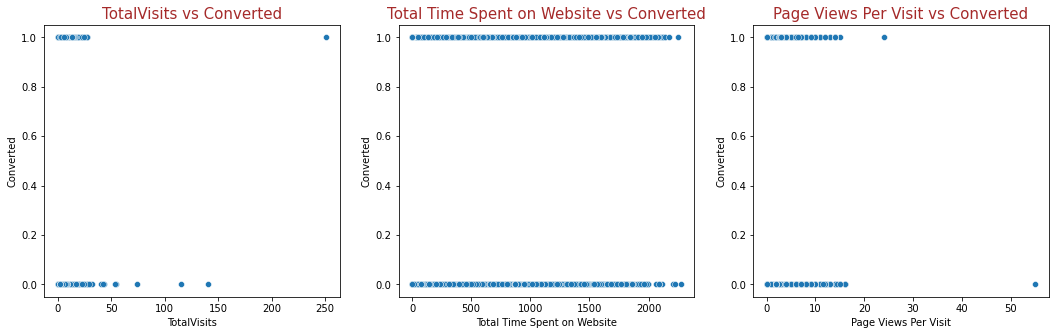

In [356]:
# Analysing all continuous columns with respect to the target variable 'Converted' using scatter plot

plt.figure(figsize=(18,5))
for num in enumerate(cont_cols):
    plt.subplot(len(cont_cols)//2,3,num[0]+1)
    plt.title(num[1] +" vs Converted", fontsize=15, fontweight=5, color='Brown')
    sns.scatterplot(leads[num[1]],leads["Converted"])    
plt.show()

### Bivariate analysis of categorical variables with respect to target variable 'Converted'


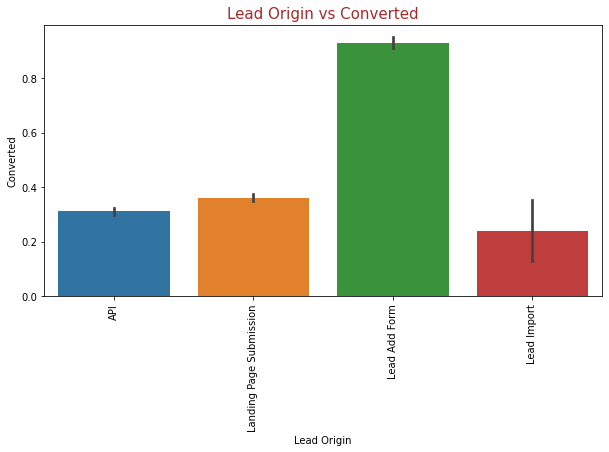

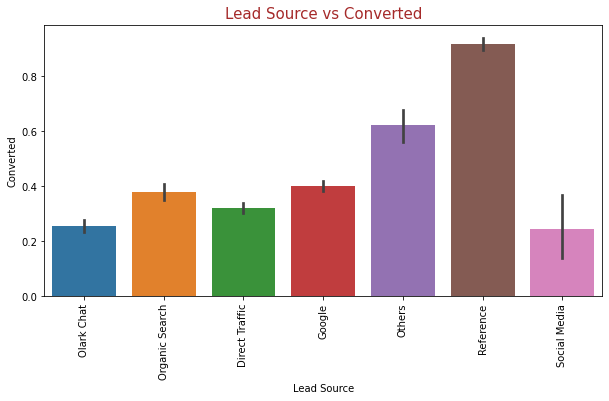

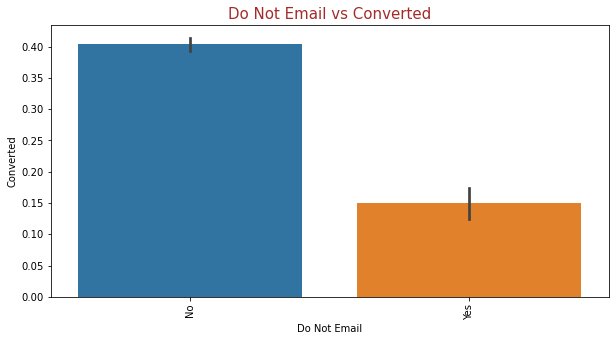

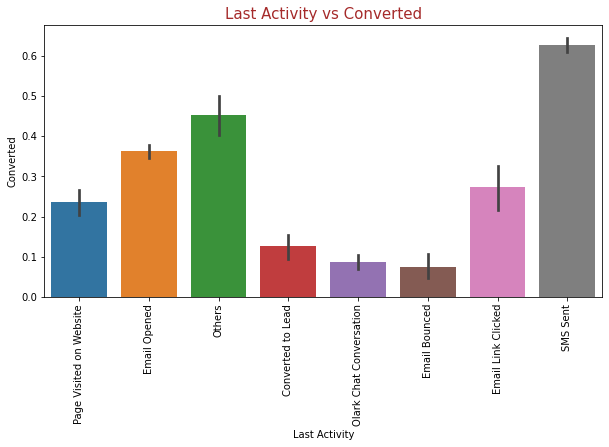

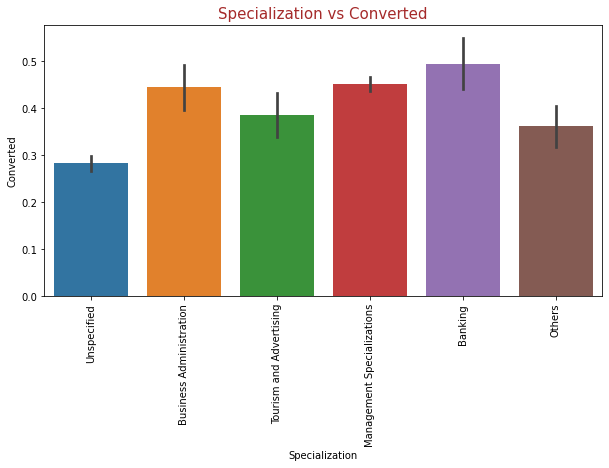

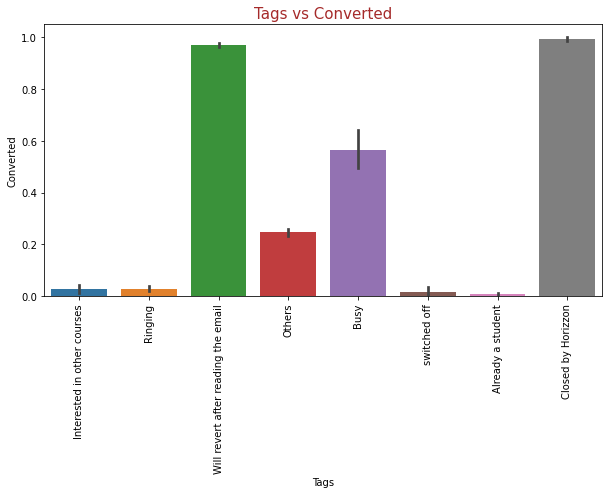

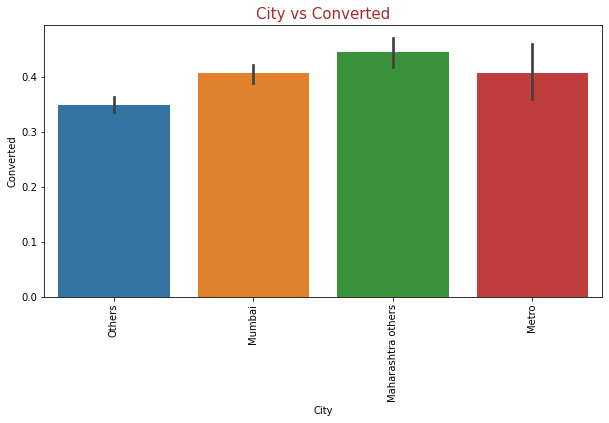

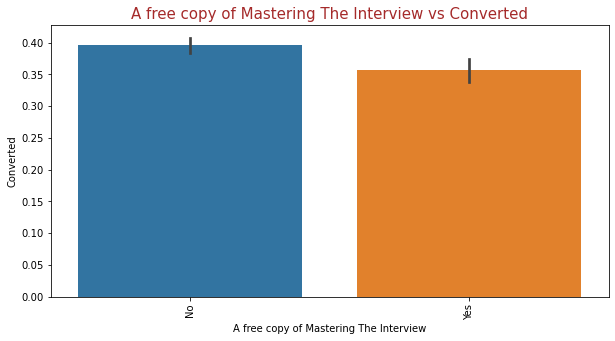

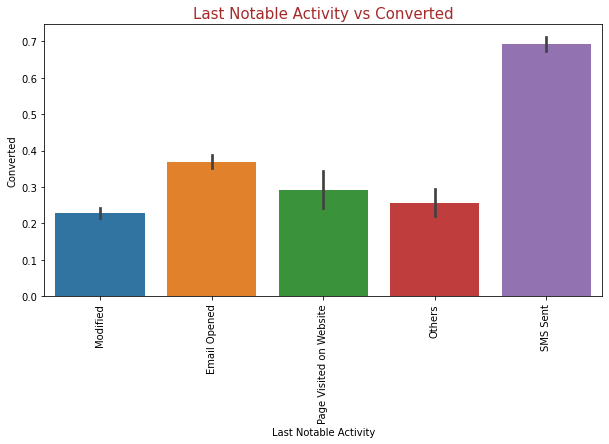

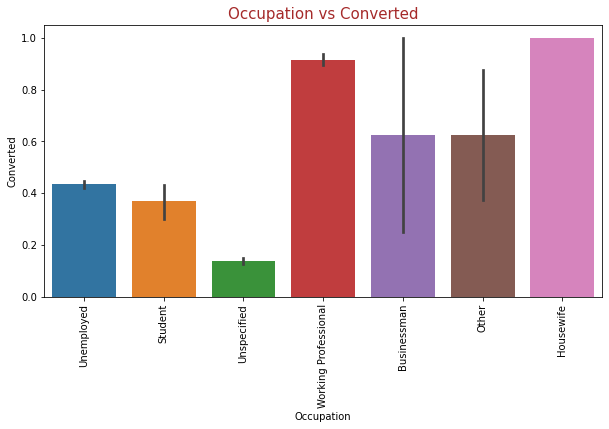

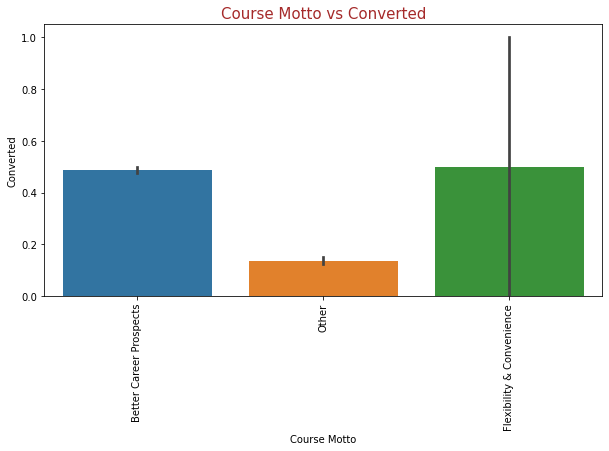

In [357]:
# Analysing all categorical columns with respect to the target variable 'Converted' using bar plot

for cat in enumerate(cat_cols):
    plt.subplots(1,1,figsize=(10,5))
    plt.title(cat[1] +" vs Converted", fontsize=15, fontweight=5, color='Brown')
    sns.barplot(leads[cat[1]],leads["Converted"])
#     plt.xlabel(cat[1], fontsize=12, fontweight=5, color='Brown')
#     plt.ylabel("Converted", fontsize=12, fontweight=5, color='Brown')
    plt.xticks(rotation=90)
plt.show()


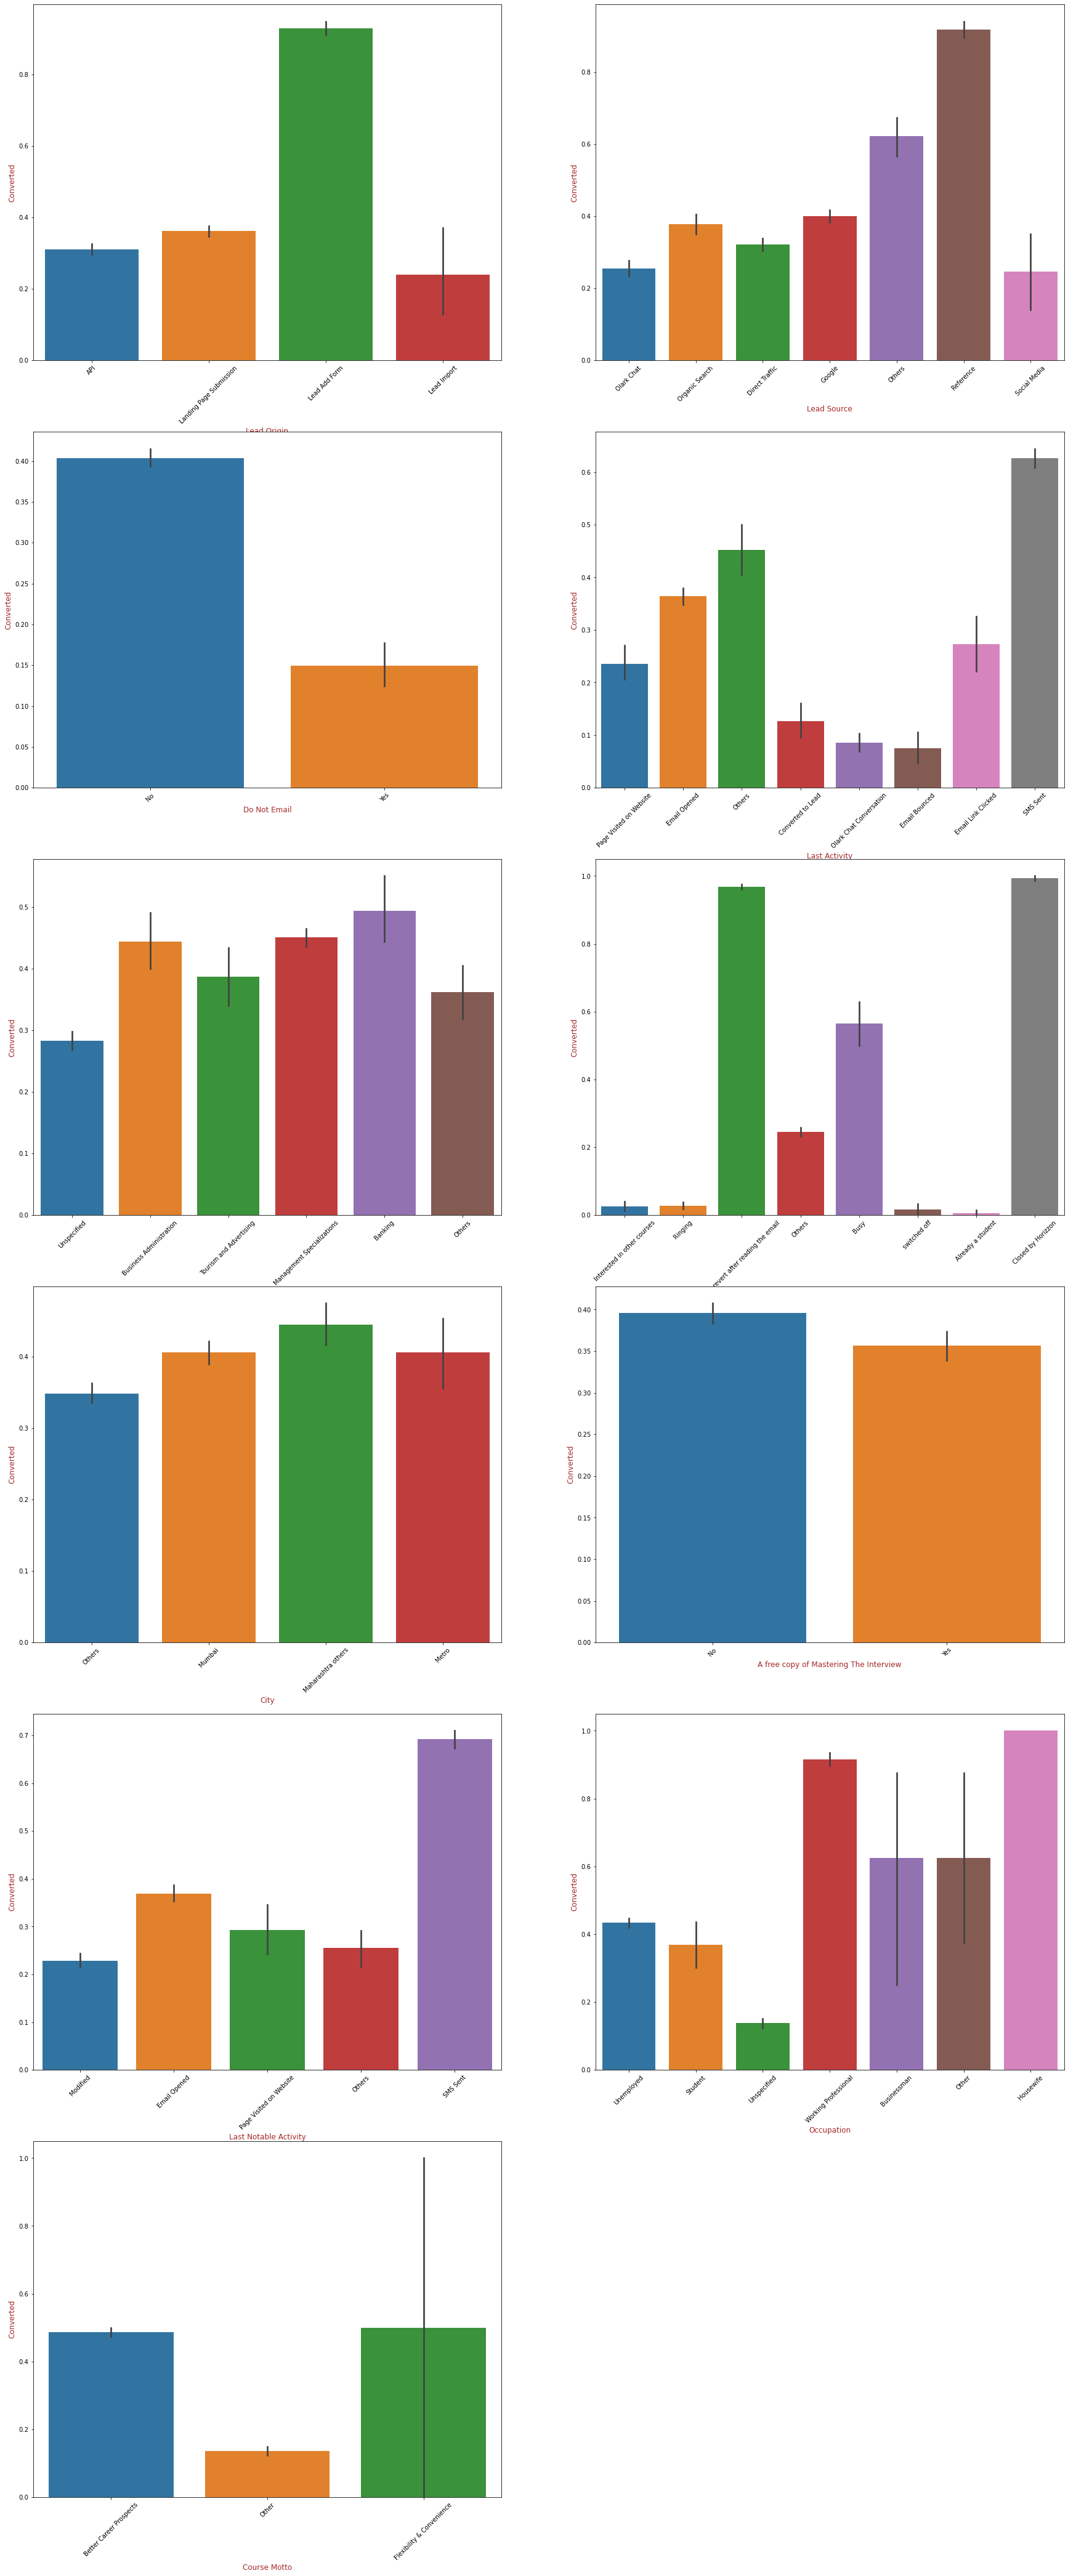

In [358]:
# Analysing all categorical columns with respect to the target variable 'Converted' using bar plot

plt.figure(figsize=(30,100))
for cat in enumerate(cat_cols):
    plt.subplot(8,2,cat[0]+1)
    sns.barplot(leads[cat[1]],leads["Converted"])
    plt.xlabel(cat[1], fontsize=12, fontweight=5, color='Brown')
    plt.ylabel("Converted", fontsize=12, fontweight=5, color='Brown')
    plt.xticks(rotation=45)
plt.show()


### Correlation of  numerical variable

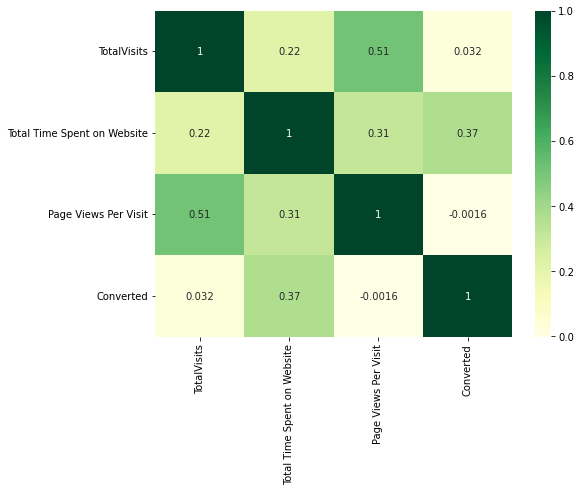

In [359]:
# Plotting a Heatmap for finding correlation of numerical variables, including the target variable.

plt.figure(figsize=(8,6))
sns.heatmap(leads[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Converted']].corr(),cmap="YlGn", annot=True)
plt.show()


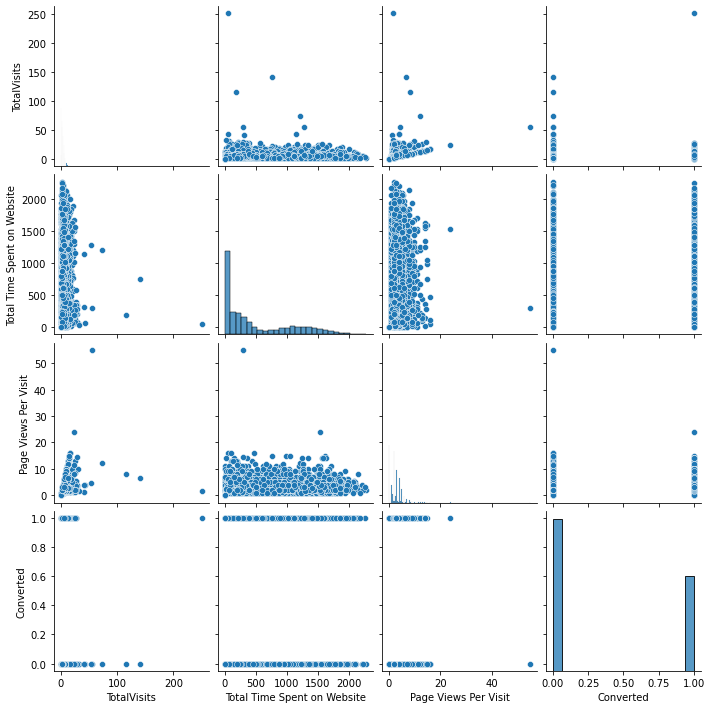

In [360]:
# Plotting a pairplot for checking correlation of numerical variables including the target variable.

sns.pairplot(data=leads, vars=['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Converted'])
plt.show()


## Multivariate Analysis

In [ ]:
leads.head()

# **Segment - III : Data Preparation For Model Building**

## Pre-processing steps

### Converting some binary variables (Yes/No) to 0/1

In [ ]:
# List of variables to map

varlist =  ['Do Not Email', 'Do Not Call', 'Search', 'X Education Forums', 'Newspaper','Digital Advertisement','Through Recommendations','A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
leads[varlist] = leads[varlist].apply(binary_map)